> # Project: Investigating TMDb(The Movie Database)movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have considered the TMDb(The Movie Database) data to perform data analysis. This dataset consists of information about more than 10,000 movies collected from The Movie Database (TMDb).

Mainly I will be using NumPy, Pandas, seaborn, and Matplotlib to complete this project.
Below are two questions I would like to answer using the above mentioned dataset.
> 1. **What kinds of properties are associated with movies that have high revenues?**

> 2. **What are the trends for the number of movie releases every year?**

In [1]:
#import statements of all the packages used in this project

from IPython.display import display
from datetime import datetime
from itertools import izip
from wordcloud import WordCloud
import numpy as np
import unicodecsv
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties


The movie dataset is loaded using the pandas as pandas dataframe.

In [2]:
filename = 'tmdb-movies.csv'
movies_df = pd.read_csv(filename)

display(movies_df.head())

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check for any duplicate rows.

In [3]:
movies_df.duplicated('id').sum()

1

I see that there is 1 duplicate row. Let's delete the duplicate row.

In [4]:
movies_df = movies_df.drop_duplicates(['id'], keep = 'first')

I look at some of the columns from the dataset to better understand the data. 

In [5]:
movies_df['budget'].describe()

count    1.086500e+04
mean     1.462429e+07
std      3.091428e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [6]:
movies_df['revenue'].describe()

count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

When I inspect the **'revenue'** and **'budget'** columns using the describe() function, I notice that more than **half of the movies(50th percentile ) have no revenue or budget**. Considering that one of the questions I have posed to be the properties of movies with high revenue, I don't need to consider the movies with zero or no revenue and budget.


So I filter the movies which has revenue and budget from the original data.

In [7]:
movies_with_revenue = movies_df.loc[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]
movies_with_revenue['revenue'].describe()


count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

Let's check if there are any null values in the columns.

In [8]:
movies_with_revenue.columns[movies_df.isnull().any()].tolist()

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

I see that the columns displayed in the above result have null values. Since I will be exploring the 'director' and 'genres' column from the above result, I will remove the null values from these two columns.

In [9]:
movies_with_revenue = movies_with_revenue[movies_with_revenue.director.notnull()]
movies_with_revenue = movies_with_revenue[movies_with_revenue.genres.notnull()]
len(movies_with_revenue)

3853

I see that there was only row with the null value in both these columns.

For my first question which is **'What kinds of properties are associated with movies that have high revenues?'** , I have to inspect columns or parameters which are associated with high revenue.

To accomplish this, I subset the *movies_with_revenue* dataframe with only the movie details with high revenue. 

I am considering the data **above the 75th percentile(124153000)** of *'revenue'* column to be **high revenue movies**.

In [10]:
high_revenue  = movies_with_revenue.loc[(movies_with_revenue['revenue'] > 124212500)]

display(high_revenue.head())

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




I have selected *'budget', 'genres', 'director'* columns from the main dataset to inspect the effect of these on the revenue of the movies.

Let me look at the data for column *genres* from the *'high_revenue'* dataframe.

In [11]:
display(high_revenue['genres'].head())

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

I can see that the *'genres'* column requires cleaning to further(removing '|' between the names) continue our analysis process. Hence the analysis on *'genres'* involved in the *'high_revenue'* movies can be further investigated in the Data Cleaning section below.  

Next I look at the '*director*' column for the high revenue movies. The below code gives us all the directors and the count of  number of movies directed by them in the *'high_revenue'* dataframe.

In [12]:
#For each director in the high revenue dataframe count the number of high revenue movies
top_dr = dict(high_revenue['director'].value_counts())
len(top_dr)

466

Since there are more than 450 directors listed from high revenue movies, I consider the top 15 movie directors.

In [13]:
top_dr = dict(high_revenue['director'].value_counts()[:15])
top_dr

{'Brett Ratner': 8,
 'Chris Columbus': 7,
 'Clint Eastwood': 8,
 'Dennis Dugan': 7,
 'Jon Turteltaub': 7,
 'M. Night Shyamalan': 7,
 'Michael Bay': 10,
 'Peter Jackson': 7,
 'Ridley Scott': 9,
 'Robert Zemeckis': 12,
 'Roland Emmerich': 8,
 'Ron Howard': 8,
 'Steven Spielberg': 23,
 'Tim Burton': 8,
 'Tony Scott': 10}

Now, lets have a look at the total number of movies directed by the above mentioned top 15 directors to compare the effect of directors towards the success(with respect to revenue) of the movies.

In [14]:
#Collecting the names of all the top directors as a list
top_dr_list = high_revenue['director'].value_counts().index.tolist()[:15]
#Subsetting the top directors from the main dataframe movies_with_revenue
directors = movies_with_revenue[movies_with_revenue['director'].isin(top_dr_list)]

#Movie count of all the movies directed by the top 15 directors
all_director_count = dict(directors['director'].value_counts())
all_director_count


{'Brett Ratner': 9,
 'Chris Columbus': 9,
 'Clint Eastwood': 24,
 'Dennis Dugan': 9,
 'Jon Turteltaub': 8,
 'M. Night Shyamalan': 9,
 'Michael Bay': 11,
 'Peter Jackson': 11,
 'Ridley Scott': 21,
 'Robert Zemeckis': 15,
 'Roland Emmerich': 9,
 'Ron Howard': 14,
 'Steven Spielberg': 27,
 'Tim Burton': 16,
 'Tony Scott': 14}

Making the data plot ready where I have mapped each director with the count of their total number of movies directed and high revenue movies respectively. 

In [15]:
top_dr_list = defaultdict(list)

# all_director_count: has the movie count of all the movies directed by the top 15 directors
# top_dr: has the movie count of high revenue movies by the top 15 directors
for dr in (all_director_count, top_dr):
    for key, value in dr.iteritems():
        top_dr_list[key].append(value)
        
final_dr = dict(top_dr_list)
directors = final_dr.keys()
director_count = final_dr.values()# [A list of count of the director's total movies directed, high revenue movies]
final_dr

{'Brett Ratner': [9, 8],
 'Chris Columbus': [9, 7],
 'Clint Eastwood': [24, 8],
 'Dennis Dugan': [9, 7],
 'Jon Turteltaub': [8, 7],
 'M. Night Shyamalan': [9, 7],
 'Michael Bay': [11, 10],
 'Peter Jackson': [11, 7],
 'Ridley Scott': [21, 9],
 'Robert Zemeckis': [15, 12],
 'Roland Emmerich': [9, 8],
 'Ron Howard': [14, 8],
 'Steven Spielberg': [27, 23],
 'Tim Burton': [16, 8],
 'Tony Scott': [14, 10]}

### Data Cleaning 

In the Data Wrangling section we found that the *genre* column needs to be cleaned before proceeding to further analysis.

In the below code, I split the *genre* column based on the separator '|' and count each genre for all the movies which has revenue greater than 0.

In [16]:
def genre_count(genres):
    #Flatten the list of lists in genres
    genres_flat = np.array(sum(genres, []))

    #Gives the count for each unique genre
    unique,counts = np.unique(genres_flat, return_counts = True)

    genre_count = dict(zip(unique, counts))
    return genre_count

#Split genre column based on '|' separator
genres = np.array(movies_with_revenue['genres'].str.split('|').values)

all_genre_count = genre_count(genres)

Once I have the count for all the movies, I'm finding the count of genres for the high revenue movies. This allow me to know the popular genres for high revenue movies.

In [17]:
def genre_count(genres):
    #Flatten the list of lists in genres
    genres_flat = np.array(sum(genres, []))

    #Gives the count for each unique genre
    unique,counts = np.unique(genres_flat, return_counts = True)

    genre_count = dict(zip(unique, counts))
    return genre_count

#Split genre column based on '|' separator
high_revenue_genres = np.array(high_revenue['genres'].str.split('|').values)

genre_count = genre_count(high_revenue_genres)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

The below plot signifies the role of directors with the high revenue movies. The data for the below graph is obtained from the Data Wrangling section.


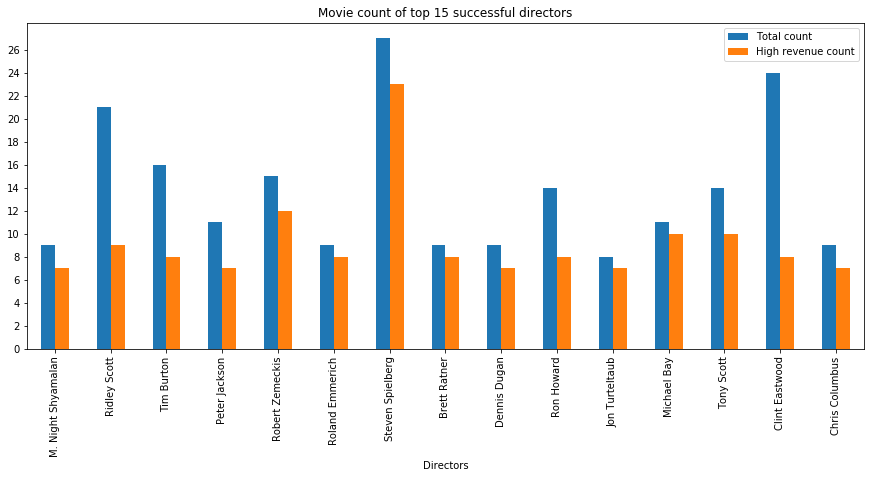

In [40]:
plot_data = pd.DataFrame({ 'Count': director_count, 'Directors': directors})
plot_data[['Total count','High revenue count']] = pd.DataFrame(plot_data.Count.values.tolist(), index= plot_data.index)
plot_data

          
plt.rcParams['figure.figsize'] = (15, 6)
plot_data.plot(x= 'Directors', y = ['Total count', 'High revenue count'], kind = 'bar')
plt.yticks(np.arange(0, 28, 2))
plt.rc('figure', titlesize=12)
plt.title('Movie count of top 15 successful directors')
plt.show()



From the above plot, we can see that most of the movies of the directors **Micheal Bay**, **Roland Emmerich**, **Steven Spielberg**, **Michael Bay** and **Brett Ratner** yield high revenue. 
Hence we can see that the *directors* may impact the success of the movies.

I have the list of genres for all the movies and the high revenue movies and we know the number of times each of them appear in the dataset. To see exactly which genres are the most popular, I have made the use of wordcloud package. In this kind of representation, all the genres are arranged in a figure with sizes that depend on their respective frequencies. 

(-0.5, 999.5, 299.5, -0.5)

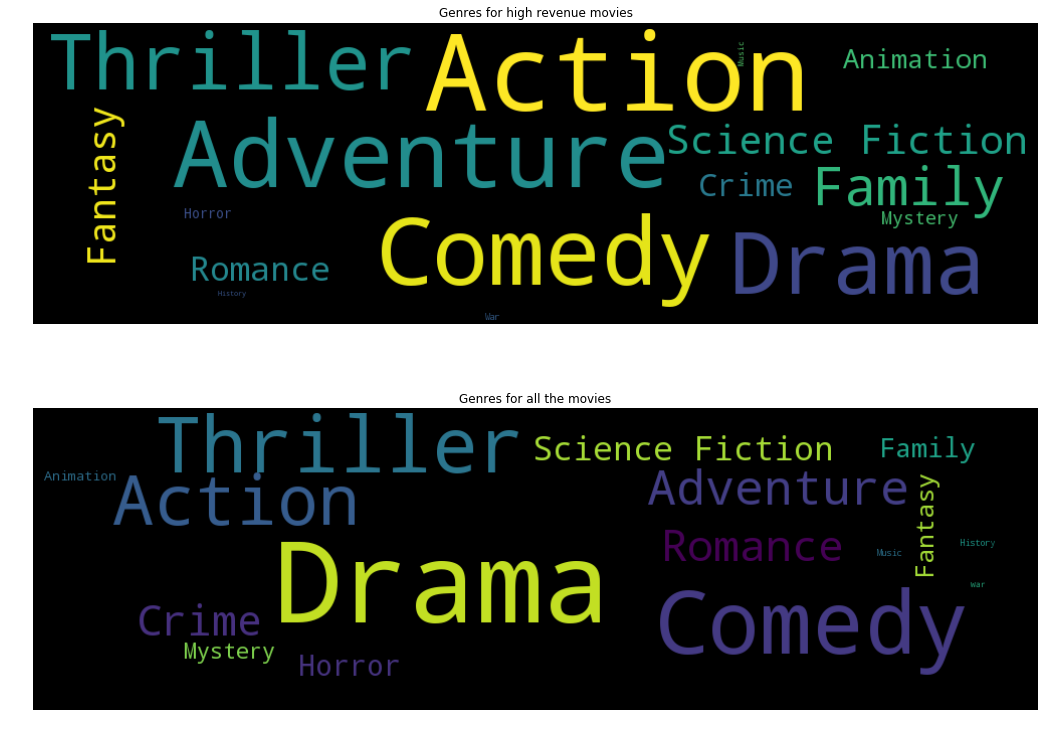

In [19]:
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1)
wordcloud.generate_from_frequencies(genre_count)
ax1.imshow(wordcloud, interpolation="bilinear")
plt.title('Genres for high revenue movies')
ax1.axis('off')

ax2 = fig.add_subplot(2,1,2)
wordcloud.generate_from_frequencies(all_genre_count)
ax2.imshow(wordcloud, interpolation="bilinear")
plt.title('Genres for all the movies')
ax2.axis('off')



We can see that though the number of 'Drama' movies released are more, the success for 'Action', 'Comedy', 'Adventure' movies are more.

Moving on to the last parameter for this question 'budget', let's see the correlation between the budget and revenue of the movies

In [20]:
corr_data = movies_with_revenue[['budget', 'revenue']]
corr = corr_data.corr()
corr

,budget,revenue
budget,1.000000,0.688526
revenue,0.688526,1.000000


I see that budget and revenue are positively correlated. Let's plot and check how the data points are distributed.

In [21]:
#Making budget and revenue columns compliant to use Linear regression using sklearn

budget = np.array(movies_with_revenue['budget'])
revenue = np.array(movies_with_revenue['revenue'])

#Reshape the variables 

budget = budget.reshape(len(budget), 1) 
revenue = revenue.reshape(len(revenue), 1)

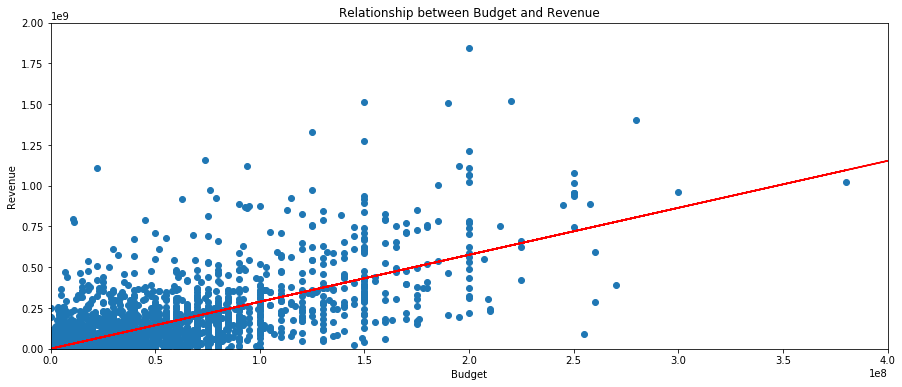

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(budget, revenue)

plt.scatter(budget, revenue)
plt.plot(budget, reg.predict(budget), color = 'r')

plt.xlim(1, 400000000)
plt.ylim(1, 2000000000)

plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue');

By using regression, I have tried to identify the strength of the effect that the independent variable(budget) have on a dependent variable(revenue). The regression line above shows some linear effect of budget on revenue.

After visualizing the model, let's estimate the above regression model using Ordinary Least Squares(OLS). OLS is a method for estimating the unknown parameters. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the observed dependent variable (revenue) in the given dataset and those predicted by the linear function. 

In [24]:
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(budget, revenue, test_size = 0.33, random_state=42)

reg = LinearRegression()
reg.fit(feature_train, target_train)

print reg.score(feature_test, target_test)
print reg.coef_


0.451803685139
[[ 2.93756063]]


The above code uses sklearn to implement Ordinary least squares Linear Regression. The method score returns the coefficient of determination r-sqaured of the prediction. R-squared is the proportion of the variance in the dependent variable that is predictable from the independent variable. In short, R-squared is one of the methods to check the goodness of a fit. The score ranges from 0 to 1 where 0 indicates that the model is not doing a good where as 1 indicates that the model is doing good.

With a r-squared value of 0.45, it explains that the change in the revenue cannot be explained by the change in the budget. 

Since the relationship between budget and revenue could not be explained well, let's try to add another parameter 'popularity' with budget to check if both these have some effect on the revenue.

In [25]:
corr_data = movies_with_revenue[['budget', 'revenue','popularity']]
corr_data.corr()

,budget,revenue,popularity
budget,1.000000,0.688526,0.446908
revenue,0.688526,1.000000,0.615498
popularity,0.446908,0.615498,1.000000


I can see that there is positive correlation between popularity and revenue. Let's plot and check how the data points are distributed.

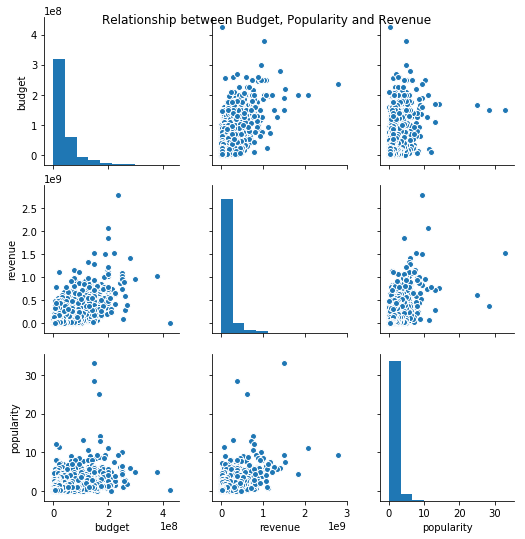

In [26]:
plt.subplots_adjust()
g = sns.pairplot(movies_with_revenue[['budget','revenue','popularity']])
g.fig.suptitle('Relationship between Budget, Popularity and Revenue');

The above scatterplot matrix appears that the predictor variables are correlated with one another.

Let's fit a multiple linear regrression model to predict revenue using budget and popularity. 

In [28]:
import statsmodels.api as sm;

movies_with_revenue['intercept'] = 1

lm = sm.OLS(movies_with_revenue['revenue'], movies_with_revenue[['intercept', 'budget', 'popularity']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2798.
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        15:04:09   Log-Likelihood:                -76903.
No. Observations:                3853   AIC:                         1.538e+05
Df Residuals:                    3850   BIC:                         1.538e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.756e+07   2.56e+06    -10.753      0.000   -3.26e+07   -2.25e+07
budget         2.1610      0.048     44.921      0.000       2.067       2.255
popularity  4.603e+07   1.38e+06     33.441      0.000    4.33e+07    4.87e+07
==============================================================================
Omnibus:                     2829.852   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           253827.138
Skew:                           2.775   Prob(JB):                         0.00
Kurtosis:                      42.373   Cond. No.                     8.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary, we can say that both budget and popularity has a positive effect on the revenue. The r-sqaured of 0.6 shows that the value of revenue might increase/decrease with the increase/decrease in both budget and popularity together. Also the p-value of both budget and popularity states they are statistically significant with respect to revenue of the movies.

In [29]:
movies_with_revenue['intercept'] = 1

lm = sm.OLS(movies_with_revenue['revenue'], movies_with_revenue[['intercept', 'budget']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     3471.
Date:                Sat, 26 May 2018   Prob (F-statistic):               0.00
Time:                        15:04:12   Log-Likelihood:                -77394.
No. Observations:                3853   AIC:                         1.548e+05
Df Residuals:                    3851   BIC:                         1.548e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.428e+05   2.75e+06      0.197      0.844   -4.85e+06    5.94e+06
budget         2.8799      0.049     58.917      0.000       2.784       2.976
==============================================================================
Omnibus:                     3219.584   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239579.134
Skew:                           3.512   Prob(JB):                         0.00
Kurtosis:                      40.987   Cond. No.                     7.50e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we find the summary for just the budget, we see a dip in r-sqaured value which signifies that the combined effect of budget and popularity is much more positive than just the budget on revenue.

### Research Question 2  (What are the trends for the number of movie releases every year?)

#### Find the number of movies released every year

In [38]:
#Count the number of movies released per each year
movie_count = dict(movies_df['release_year'].value_counts())


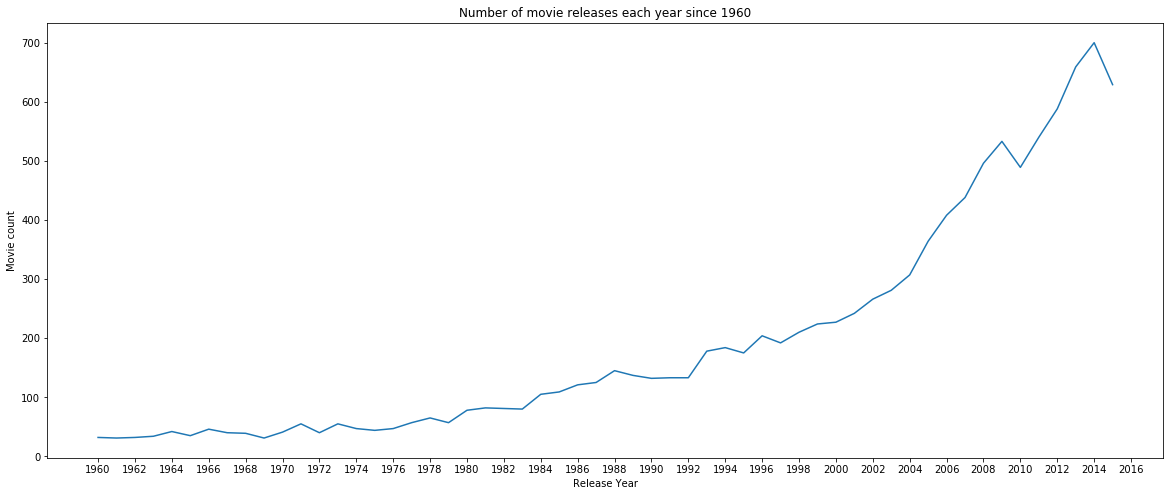

In [32]:
year = list(movie_count.keys())
count = list(movie_count.values())

plt.rcParams['figure.figsize'] = (20, 8)
plt.plot(year, count)
plt.title('Number of movie releases each year since 1960')
plt.xlabel('Release Year')
plt.ylabel('Movie count')
plt.xticks(np.arange(1960, 2018, 2))
plt.show()

I can see a steep rise in the number of movies released after 2004. Also there is a peak in the year 2008 and dipped considerably the next year. This dip could probably be due to the economic crisis.


<a id='conclusions'></a>
## Conclusions

Finally I would like to conclude that few directors, few genres, and budget and popularity together may impact the revenue of the movies. Also the number of movies being released is increasing rapidly over the past few years.

**Limitations:**


One of the limitations of my exploration is that I have used individual variables to check the impact on revenue. I could have combined the parameters, for example, the genres of the top directors. 

I have also not explored the impact of few of the parameters like 'Cast' and 'Production Companies' on revenue.
